In [10]:
import numpy as np
from typing import Tuple
from tqdm.auto import tqdm
import pygame
import threading

In [11]:
from maze import Maze

# Constants
GAME_HEIGHT = 600
GAME_WIDTH = 600
NUMBER_OF_TILES = 25
SCREEN_HEIGHT = 700
SCREEN_WIDTH = 700
TILE_SIZE = GAME_HEIGHT // NUMBER_OF_TILES

# Maze layout
level = [
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
    "X XXXXXXXX          XXXXX",
    "X XXXXXXXX  XXXXXX  XXXXX",
    "XP     XXX  XXXXXX  XXXXX",
    "X      XXX  XXX         X",
    "XXXXXX  XX  XXX        XX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "X  XXX      XXXXXXXXXXXXX",
    "X  XXX  XXXXXXXXXXXXXXXXX",
    "X         XXXXXXXXXXXXXXX",
    "X             XXXXXXXXXXX",
    "XXXXXXXXXXX      XXXXX  X",
    "XXXXXXXXXXXXXXX  XXXXX  X",
    "XXX  XXXXXXXXXX         X",
    "XXX                     X",
    "XXX         XXXXXXXXXXXXX",
    "XXXXXXXXXX  XXXXXXXXXXXXX",
    "XXXXXXXXXX              X",
    "XX   XXXXX              X",
    "XX   XXXXXXXXXXXXX  XXXXX",
    "XX    XXXXXXXXXXXX  XXXXX",
    "XX        XXXX          X",
    "XXXX                    X",
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
]

env = Maze(
    level,
    goal_pos=(23, 20),
    MAZE_HEIGHT=GAME_HEIGHT,
    MAZE_WIDTH=GAME_WIDTH,
    SIZE=NUMBER_OF_TILES,
)

NO_OF_ACTIONS = 4

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_policy(probs_or_qvals, action_meanings=None):
    if action_meanings is None:
        action_meanings = {0: 'L', 1: 'U', 2: 'R', 3: 'D'}
    fig = plt.figure(figsize=(7,7))
    max_prob_actions = probs_or_qvals.argmax(axis=-1)
    probs_copy = max_prob_actions.copy().astype(np.object)
    for key in action_meanings:
        probs_copy[probs_copy == key] = action_meanings[key]
    sns.heatmap(max_prob_actions, annot=probs_copy, fmt='', cbar=False, cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 12}, linewidths=2)
    plt.axis("off")
    plt.suptitle("Policy", size=24)
    plt.tight_layout()

In [13]:
action_values = np.zeros((env.number_of_tiles, env.number_of_tiles, NO_OF_ACTIONS))

In [14]:
import numpy as np
def policy(state, epsilon):

    if np.random.rand() < epsilon:
        return np.random.choice(NO_OF_ACTIONS)
    
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [15]:
def sarsa(action_values, policy, epsilon = 0.2, episodes = 1000, gamma = 0.99, alpha = 0.2):


    for _ in tqdm(range(episodes)):
        state = env.reset_state()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done = env.simulate_step(state, action)
            next_action = policy(next_state, epsilon)
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            action = next_action
            state = next_state


In [16]:
sarsa(action_values, policy)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
action_values

array([[[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [-42.56495869, -42.65810792, -42.61115903, -42.65631221],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [-42.63289076, -42.6072864 , -42.5663348 , -42.542841  ],
        [  0.        ,   0.        ,   0.     

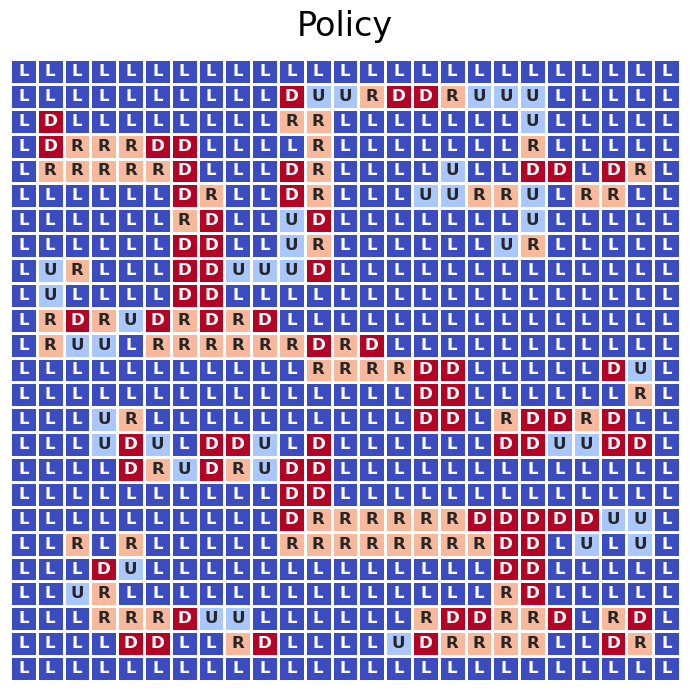

In [9]:
plot_policy(action_values)

In [13]:

# Maze layout
level = [
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
    "X XXXXXXXX          XXXXX",
    "X XXXXXXXX  XXXXXX  XXXXX",
    "XP     XXX  XXXXXX  XXXXX",
    "X      XXX  XXX         X",
    "XXXXXX  XX  XXX        XX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "X  XXX      XXXXXXXXXXXXX",
    "X  XXX  XXXXXXXXXXXXXXXXX",
    "X         XXXXXXXXXXXXXXX",
    "X             XXXXXXXXXXX",
    "XXXXXXXXXXX      XXXXX  X",
    "XXXXXXXXXXXXXXX  XXXXX  X",
    "XXX  XXXXXXXXXX         X",
    "XXX                     X",
    "XXX         XXXXXXXXXXXXX",
    "XXXXXXXXXX  XXXXXXXXXXXXX",
    "XXXXXXXXXX              X",
    "XX   XXXXX              X",
    "XX   XXXXXXXXXXXXX  XXXXX",
    "XX    XXXXXXXXXXXX  XXXXX",
    "XX        XXXX          X",
    "XXXX                    X",
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
]

env = Maze(
    level,
    goal_pos=(23, 20),
    MAZE_HEIGHT=GAME_HEIGHT,
    MAZE_WIDTH=GAME_WIDTH,
    SIZE=NUMBER_OF_TILES,
)


SCREEN_HEIGHT = 700
SCREEN_WIDTH = 700

TILE_SIZE = GAME_HEIGHT // NUMBER_OF_TILES


# Initialize Pygame
pygame.init()

# Create the game window
screen = pygame.display.set_mode((SCREEN_HEIGHT, SCREEN_WIDTH))
pygame.display.set_caption("Maze Solver")  # Set a window title

surface = pygame.Surface((GAME_HEIGHT, GAME_WIDTH))
clock = pygame.time.Clock()
running = True

# Get the initial player and goal positions
treasure_pos = env.goal_pos
player_pos = env.state

action_values = np.zeros((NUMBER_OF_TILES, NUMBER_OF_TILES, 4))
sarsa(action_values, policy, episodes = 3000, epsilon = 0.3)

# Game loop
while running:

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear the surface
    surface.fill((27, 64, 121))

    # Draw the walls in the maze
    for row in range(len(level)):
        for col in range(len(level[row])):
            if level[row][col] == "X":
                pygame.draw.rect(
                    surface,
                    (241, 162, 8),
                    (col * TILE_SIZE, row * TILE_SIZE, TILE_SIZE, TILE_SIZE),
                )

    # Draw the player's position
    pygame.draw.rect(
        surface,
        (255, 51, 102),
        pygame.Rect(
            player_pos[1] * TILE_SIZE,
            player_pos[0] * TILE_SIZE,
            TILE_SIZE,
            TILE_SIZE,
        ).inflate(-TILE_SIZE / 3, -TILE_SIZE / 3),
        border_radius=3,
    )

    # Draw the goal position
    pygame.draw.rect(
        surface,
        "green",
        pygame.Rect(
            env.goal_pos[1] * TILE_SIZE,
            env.goal_pos[0] * TILE_SIZE,
            TILE_SIZE,
            TILE_SIZE,
        ).inflate(-TILE_SIZE / 3, -TILE_SIZE / 3),
        border_radius=TILE_SIZE,
    )

    # Update the screen
    screen.blit(
        surface, ((SCREEN_HEIGHT - GAME_HEIGHT) / 2, (SCREEN_WIDTH - GAME_WIDTH) / 2)
    )
    pygame.display.flip()


    # Get the action based on the current policy
    if env.state != env.goal_pos:
        action = np.argmax(action_values[player_pos])
    
    else: 
        action = 5
        
    # Move the player based on the action
    if (
        action == 1
        and player_pos[0] > 0
        and (player_pos[0] - 1, player_pos[1]) not in env.walls
    ):
        player_pos = (player_pos[0] - 1, player_pos[1])
        env.state = player_pos
    elif (
        action == 3
        and player_pos[0] < NUMBER_OF_TILES - 1
        and (player_pos[0] + 1, player_pos[1]) not in env.walls
    ):
        player_pos = (player_pos[0] + 1, player_pos[1])
        env.state = player_pos
    elif (
        action == 0
        and player_pos[1] > 0
        and (player_pos[0], player_pos[1] - 1) not in env.walls
    ):
        player_pos = (player_pos[0], player_pos[1] - 1)
        env.state = player_pos
    elif (
        action == 2
        and player_pos[1] < NUMBER_OF_TILES - 1
        and (player_pos[0], player_pos[1] + 1) not in env.walls
    ):
        player_pos = (player_pos[0], player_pos[1] + 1)
        env.state = player_pos


    elif action == 5:
        pass

    # Control the frame rate of the game
    clock.tick(60)

# Quit Pygame when the game loop is exited
pygame.quit()


  0%|          | 0/3000 [00:00<?, ?it/s]